<a href="https://colab.research.google.com/github/VictorCampelo/PythonToFinances/blob/master/myFinancePy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [0]:
style.use('ggplot')

In [0]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [0]:
df = web.DataReader('PETR3.SA', 'yahoo', start, end)

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.67,9.00,9.58,9.00,12710900.0,8.525017
2015-01-05,8.96,8.25,8.64,8.27,25730600.0,7.833544
2015-01-06,8.53,7.78,8.28,8.06,29754600.0,7.634626
2015-01-07,8.51,8.08,8.30,8.45,34128300.0,8.004045
2015-01-08,9.26,8.52,8.60,9.02,37487300.0,8.543962


In [0]:
df.to_csv('petrobras.csv')

In [18]:
df = pd.read_csv('petrobras.csv', parse_dates=True, index_col=0)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.67,9.00,9.58,9.00,12710900.0,8.525017
2015-01-05,8.96,8.25,8.64,8.27,25730600.0,7.833544
2015-01-06,8.53,7.78,8.28,8.06,29754600.0,7.634626
2015-01-07,8.51,8.08,8.30,8.45,34128300.0,8.004045
2015-01-08,9.26,8.52,8.60,9.02,37487300.0,8.543962


In [20]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-08,19.650000,18.600000,18.700001,19.549999,21161300.0,19.549999
2020-05-11,19.830000,18.990000,19.379999,19.030001,23059300.0,19.030001
2020-05-12,19.570000,18.870001,19.379999,18.870001,20641000.0,18.870001
2020-05-13,19.129999,18.010000,18.959999,18.129999,20723300.0,18.129999
2020-05-14,0.000000,0.000000,0.000000,17.690001,0.0,17.690001


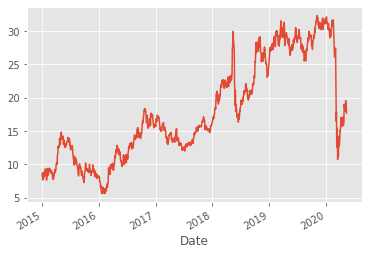

In [21]:
df['Adj Close'].plot()

In [0]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

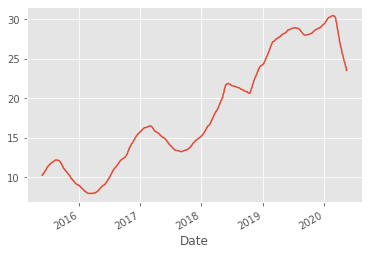

In [25]:
df['100ma'].plot()

In [26]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2015-01-02,9.67,9.00,9.58,9.00,12710900.0,8.525017,NaN
2015-01-05,8.96,8.25,8.64,8.27,25730600.0,7.833544,NaN
2015-01-06,8.53,7.78,8.28,8.06,29754600.0,7.634626,NaN
2015-01-07,8.51,8.08,8.30,8.45,34128300.0,8.004045,NaN
2015-01-08,9.26,8.52,8.60,9.02,37487300.0,8.543962,NaN


In [0]:
df.dropna(inplace=True)

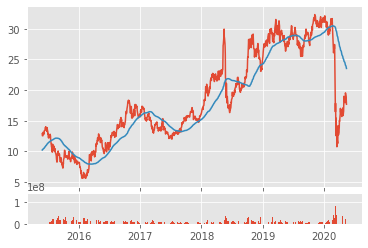

In [34]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()